## Loading Libraries and Data

In [112]:

from os import walk

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

from keras import callbacks
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [148]:
train = pd.read_csv("../input/digit-recognizer/train.csv")
test = pd.read_csv("../input/digit-recognizer/test.csv")
sample_submission = pd.read_csv("../input/digit-recognizer/sample_submission.csv")

In [149]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [150]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [151]:
X_train = np.array(train.drop(['label'],axis=1)).reshape(len(train),28,28)
X_train.shape

(42000, 28, 28)

In [152]:
y_train = np.array(train['label']).reshape(len(train),1)
y_train.shape

(42000, 1)

In [153]:
X_train, X_val, y_train, y_val = train_test_split(
X_train, y_train, test_size=0.20, random_state=42)

[8]


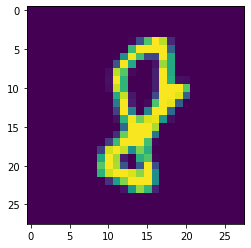

In [154]:
plt.imshow(X_val[0])
print(y_val[0])

In [155]:
X_test = np.array(test).reshape(len(test),28,28)
X_test.shape

(28000, 28, 28)

## Noramlizing Data

In [156]:
X_train = X_train/255.0
X_val = X_val/255.0
X_test = X_test/255.0

## Model Architecture

In [251]:
def my_model():
    inputs = keras.layers.Input(shape=(28,28,1))
    x = keras.layers.ZeroPadding2D(padding=(1,1),input_shape=(28,28,1))(inputs)
    x = keras.layers.Conv2D(32,3)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = keras.layers.MaxPooling2D(pool_size=2,strides=2)(x)
    x = keras.layers.ZeroPadding2D(padding=(1,1))(x)
    x = keras.layers.Dropout(0.1)(x)

    
    x = keras.layers.Conv2D(64,3)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = keras.layers.MaxPooling2D(pool_size=2,strides=2)(x)
    x = keras.layers.Dropout(0.2)(x)
    

    x = keras.layers.Conv2D(256,3)(x)
    x = keras.layers.BatchNormalization()(x)
    x = keras.activations.relu(x)
    x = keras.layers.MaxPooling2D(pool_size=2,strides=2)(x)
    x = keras.layers.Dropout(0.3)(x)
    
    
    x = keras.layers.Flatten()(x)
    x = keras.layers.Dense(128,activation='relu')(x)
    outputs = keras.layers.Dense(10,activation='softmax')(x)
    x = keras.layers.Dropout(0.4)(x)
    
    
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model
    
    
    
    
model = my_model()
model.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
zero_padding2d_18 (ZeroPaddi (None, 30, 30, 1)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_27 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
tf.nn.relu_27 (TFOpLambda)   (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
zero_padding2d_19 (ZeroPaddi (None, 16, 16, 32)        0   

## Callbacks

- Saving the best model (with the lowest loss)
- Learning Rate Decay at 25th, 50th and 75th Epoch


In [252]:
### CallBacks

count = input('count: ')

### Save the best model
saved_callbacks = callbacks.ModelCheckpoint('./saved_models/bestmodel_'+str(count)+' '+ str(message),
                                     save_weights_only=False, 
                                     monitor='loss', 
                                     save_best_only=True)

### Learning Rate Scheduler
def scheduler(epoch, lr):
    if epoch == 25:
        print('\n learning_rate:', lr/10)
        return lr / 10

    elif epoch == 50:
        print('\n learning_rate:', lr/10)
        return lr / 10
    
    elif epoch == 75:
        print('\n learning_rate:', lr/100)
        return lr / 100
    
    elif epoch == 80:
        print('\n learning_rate:', lr/2.5)
        return lr / 2.5

    else:
        return lr

    
### Complie and Fit Model 
model.compile(optimizer = keras.optimizers.Adam(),
             loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy',])  

history = model.fit(X_train, y_train, epochs=100, verbose=2,
          batch_size=64,
           callbacks=[tf.keras.callbacks.LearningRateScheduler(scheduler),
                     saved_callbacks]
    )



count:  2


Epoch 1/100
525/525 - 2s - loss: 0.2315 - accuracy: 0.9263
Epoch 2/100
525/525 - 2s - loss: 0.0822 - accuracy: 0.9744
Epoch 3/100
525/525 - 2s - loss: 0.0604 - accuracy: 0.9811
Epoch 4/100
525/525 - 2s - loss: 0.0501 - accuracy: 0.9842
Epoch 5/100
525/525 - 2s - loss: 0.0460 - accuracy: 0.9860
Epoch 6/100
525/525 - 2s - loss: 0.0402 - accuracy: 0.9869
Epoch 7/100
525/525 - 2s - loss: 0.0358 - accuracy: 0.9882
Epoch 8/100
525/525 - 2s - loss: 0.0319 - accuracy: 0.9892
Epoch 9/100
525/525 - 2s - loss: 0.0280 - accuracy: 0.9910
Epoch 10/100
525/525 - 2s - loss: 0.0267 - accuracy: 0.9902
Epoch 11/100
525/525 - 2s - loss: 0.0272 - accuracy: 0.9911
Epoch 12/100
525/525 - 2s - loss: 0.0243 - accuracy: 0.9916
Epoch 13/100
525/525 - 2s - loss: 0.0209 - accuracy: 0.9929
Epoch 14/100
525/525 - 2s - loss: 0.0231 - accuracy: 0.9929
Epoch 15/100
525/525 - 2s - loss: 0.0220 - accuracy: 0.9925
Epoch 16/100
525/525 - 2s - loss: 0.0162 - accuracy: 0.9949
Epoch 17/100
525/525 - 2s - loss: 0.0184 - accura

## Load the Best Model Version and Evaluate on Validation Data

In [253]:
model = keras.models.load_model('./saved_models/bestmodel_'+str(count)+' '+ str(message))

In [266]:
model.evaluate(X_val, y_val)

263/263 [==============================] - 1s 2ms/step - loss: 0.0198 - accuracy: 0.9952


[0.019798066467046738, 0.9952380657196045]

In [267]:
y_preds = model.predict(X_test)

In [268]:
preds = pd.Series([np.argmax(i) for i in y_preds], name='Label')
preds.unique()

array([2, 0, 9, 3, 7, 5, 4, 1, 6, 8])

2


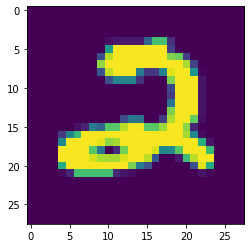

In [269]:
plt.imshow(X_test[0])
print(preds[0])

## Create a submission file

In [270]:
index_list = []
for i, item in enumerate(preds):
    index_list.append(i+1)
    
image_id = pd.Series(index_list, name='ImageId')
submit = pd.concat([image_id, preds], axis=1)

In [271]:
submit.to_csv('./submission_'+str(count)+'.csv', index=False)

### Ensembling the csv's together (Mode of prediction)

In [281]:
count = 2
csv_lst = [pd.read_csv('./submission_'+ str(i) +'.csv') for i in range(count+1)]

Label_df = pd.DataFrame()
for i in range(len(csv_lst)):
    Label_df = pd.concat([Label_df,csv_lst[i].Label], axis=1)
    Label_df = Label_df.rename(columns={"Label": "Label"+str(i)})
    
mode_df = Label_df.mode(axis=1)

final = pd.DataFrame(submit['ImageId'])
final['Label'] = mode_df[0].astype(int)
final

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [285]:
final.to_csv('./submission.csv', index=False)